In [1]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the Test and Train data

train_df=pd.read_excel('Data_Train.xlsx')
test_df=pd.read_excel('Data_Test.xlsx')

In [3]:
#Too see all the columns
pd.set_option('display.max_columns',None)

In [4]:
#Seeing the first five row of train data
train_df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [5]:
#Seeing the first five row of test data
test_df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [6]:
#Checking the shape of train and test data
print('Shape of Train data is:',train_df.shape)
print('\n')
print('Shape of Test data is:',test_df.shape)

Shape of Train data is: (12690, 9)


Shape of Test data is: (4231, 8)


## Create column and combine the dataset.

In [7]:
#Giving tag for training and testing data.
train_df['source']='Train'
test_df['source']='Test'

In [8]:
#Adding the dataset
df=pd.concat([train_df,test_df],sort=True,ignore_index=True)
df.head()

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,source
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49 votes,Train
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30 votes,Train
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221 votes,Train
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24 votes,Train
4,Mumbai,300.0,Desserts,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165 votes,Train


In [9]:
#Checking the last five row of dataset
df.tail()

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,source
16916,New Delhi,NaN,"North Indian, Mughlai, Chinese",Punjabi Bagh,3.9,9057,11:30am – 11:30pm (Mon-Sun),CASUAL DINING,287 votes,Test
16917,Bangalore,NaN,"Biryani, North Indian, Sandwich, Salad, Wraps",HSR Layout,4.3,1247,11am – 1am (Mon-Sun),None,469 votes,Test
16918,Faridabad,NaN,"Continental, North Indian",Sector 86,3.7,8617,9:30am – 10:30pm (Mon-Sun),QUICK BITES,53 votes,Test
16919,Kochi,NaN,"Rolls, Beverages",Kochi,-,6485,"11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",QUICK BITES,NaN,Test
16920,Bandra West,NaN,Mughlai,Perry Cross Road,3.7,2421,5pm – 1am (Mon-Sun),QUICK BITES,63 votes,Test


In [10]:
#Checking the shape of dataframe
print('Shape of Train data is:',train_df.shape)
print('Shape of Test data is:',test_df.shape)
print('Shape of combined data is:',df.shape)

Shape of Train data is: (12690, 10)
Shape of Test data is: (4231, 9)
Shape of combined data is: (16921, 10)


In [11]:
#Checking the duplicate rows
df.duplicated().sum()

26

In [12]:
#Droping the duplicate rows
df=df.drop_duplicates()
df.shape

(16895, 10)

Now all the duplicates rows are dropped.

In [13]:
#Checking the columns
df.columns

Index(['CITY', 'COST', 'CUISINES', 'LOCALITY', 'RATING', 'RESTAURANT_ID',
       'TIME', 'TITLE', 'VOTES', 'source'],
      dtype='object')

In [14]:
#Checking the data types of columns
df.dtypes

CITY              object
COST             float64
CUISINES          object
LOCALITY          object
RATING            object
RESTAURANT_ID      int64
TIME              object
TITLE             object
VOTES             object
source            object
dtype: object

In [15]:
#checking the information of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16895 entries, 0 to 16920
Data columns (total 10 columns):
CITY             16748 non-null object
COST             12665 non-null float64
CUISINES         16895 non-null object
LOCALITY         16767 non-null object
RATING           16891 non-null object
RESTAURANT_ID    16895 non-null int64
TIME             16895 non-null object
TITLE            16895 non-null object
VOTES            15293 non-null object
source           16895 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 1.4+ MB


Observattion:
    
    1-The dataset contains null values in some columns.
    
    2-Dataset contains two type of columns one is categorical and other is numeric.
    
    3-Numeric columns are Cost and Resturant_ID and categorical columns are City, Cuisines, Locality,Raing, Time, Title
      and votes.
    
    4-Source column is also object data type but it is created by me to differentiate between train and test data.

### Printing the Categorical data types and their unique value

In [16]:
#Printing the object data types and their unique values

for column in df.columns:
    if df[column].dtype==object:
        print(str(column) + ' : ' + str(df[column].nunique()))
        print(df[column].unique())
        print('******************************************************************************')

CITY : 450
['Thane' 'Chennai' 'Mumbai' 'Bangalore' 'Gurgaon' 'Hyderabad' 'Kochi'
 'Thane West' 'Andheri Lokhandwala' 'New Delhi' 'Andheri West'
 'Malad East' '682036' 'Bangalor' 'Navi Mumbai' 'Bandra West' 'Delhi'
 'Noida' 'Bangalore-560066' 'Secunderabad' nan 'India' 'Madhuranagar'
 'Chennai Teynampet' 'Faridabad' 'Chembur.' 'Maharashtra'
 'opp gurudwara Shakurpur' 'Telagana Land Line:040-48507016' 'Ghaziabad'
 'Karnataka' 'Kerala' 'Edappally' 'Kadavanthra' 'Ernakulam Circle kochi'
 'Bengalore' 'Near Reliance Fresh' 'Kilpauk' 'Bengaluru' 'Kothaguda'
 'Goregaon West' 'Banglore' 'Tamil Nadu' 'Kakkanad' 'Kochi Elamkulam'
 'Outer Ring Road' 'Mulund East'
 'Secunderabad main road near signal NMREC COLLEGE' 'Telangana'
 'Ponnuruni Kochi' 'Gachibowli' 'Semmancheri'
 '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034'
 'Mumbai Mahim' 'Powai (Next to Powai Plaza)' 'Dombivali East'
 'Kochi Vyttila' 'Kandivali' 'Kochi Palarivattom' 'Dewan Rama Road'
 'Gurugram' 'Sector 51 Noida' 'Kal

['11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)' '6pm – 11pm (Mon-Sun)'
 '11am – 3:30pm, 7pm – 11pm (Mon-Sun)' ...
 '12noon – 4pm, 7pm – 10:30pm (Mon-Sat),12noon –...'
 '6am – 12:30AM (Mon, Tue, Wed, Thu, Sat, Sun), 6am...'
 '11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun), 3pm...']
******************************************************************************
TITLE : 123
['CASUAL DINING' 'CASUAL DINING,BAR' 'QUICK BITES' 'DESSERT PARLOR' 'CAFÉ'
 'MICROBREWERY' 'QUICK BITES,BEVERAGE SHOP' 'CASUAL DINING,IRANI CAFE'
 'BAKERY,QUICK BITES' 'None' 'BAR,CASUAL DINING' 'BAR' 'PUB'
 'BEVERAGE SHOP' 'FINE DINING' 'CAFÉ,QUICK BITES'
 'BEVERAGE SHOP,DESSERT PARLOR' 'SWEET SHOP,QUICK BITES'
 'DESSERT PARLOR,SWEET SHOP' 'BAKERY' 'BAKERY,DESSERT PARLOR' 'BAR,LOUNGE'
 'FOOD COURT' 'LOUNGE' 'DESSERT PARLOR,BEVERAGE SHOP'
 'LOUNGE,CASUAL DINING' 'FOOD TRUCK' 'QUICK BITES,FOOD COURT' 'SWEET SHOP'
 'BEVERAGE SHOP,FOOD COURT' 'PUB,CASUAL DINING' 'MESS'
 'MICROBREWERY,CASUAL DINING' 'CASUAL DINING,SWEET SHOP' 'KIO

## Summary Statistics

In [17]:
df.describe()

,COST,RESTAURANT_ID
count,12665.000000,16895.000000
mean,655.400790,7765.922344
std,627.389831,4494.226728
min,20.000000,0.000000
25%,300.000000,3869.500000
50%,500.000000,7750.000000
75%,800.000000,11672.000000
max,14000.000000,15573.000000


Observation:
    
    1-The minimum cost of food is 20 rupees and maximum is 14000 rupees.
    
    2-The difference between 75% and max is higher in cost column so there may be outliers present in these columns.
    
    3-Mean is slightly greater than median thats why data is right skewed.

In [18]:
#Here we check the summary of object and boolean columns
df.describe(include=['object'])

,CITY,CUISINES,LOCALITY,RATING,TIME,TITLE,VOTES,source
count,16748,16895,16767,16891,16895,16895,15293,16895
unique,450,5183,1636,32,3295,123,2075,2
top,Chennai,North Indian,Gachibowli,3.9,11am – 11pm (Mon-Sun),QUICK BITES,44 votes,Train
freq,2854,714,216,1638,1861,5627,92,12665


Observation:
    
    1-Here in city column there are 450 unique values and Chennai is the most frequent city.
    
    2-In Cuisines column there are 714 unique dishes and among them most frequent dish is North Indian.
    
    3-In Locality column there are 344 unique locality and among them Gachibowli is the most frequent location.
    
    4-Maximum people give 3.9 rating among 32 unique rating.

# Exploratory Data Analysis

In [19]:
#Printing the number of unique values in the data set
for i in df.columns:
    print("Unique values in", i, df[i].nunique())

Unique values in CITY 450
Unique values in COST 86
Unique values in CUISINES 5183
Unique values in LOCALITY 1636
Unique values in RATING 32
Unique values in RESTAURANT_ID 15574
Unique values in TIME 3295
Unique values in TITLE 123
Unique values in VOTES 2075
Unique values in source 2


In [20]:
#Checking the mean cost of food in Banglore city
df[df['CITY'] == 'Bangalore']['COST'].mean()

669.0251748251749

In [21]:
#Checking the mean cost of food in Delhi
df[df['CITY'] == 'Delhi']['COST'].mean()

531.25

In [22]:
#Checking the mean cost of food in Mumbai
df[df['CITY'] == 'Mumbai']['COST'].mean()

866.082895504962

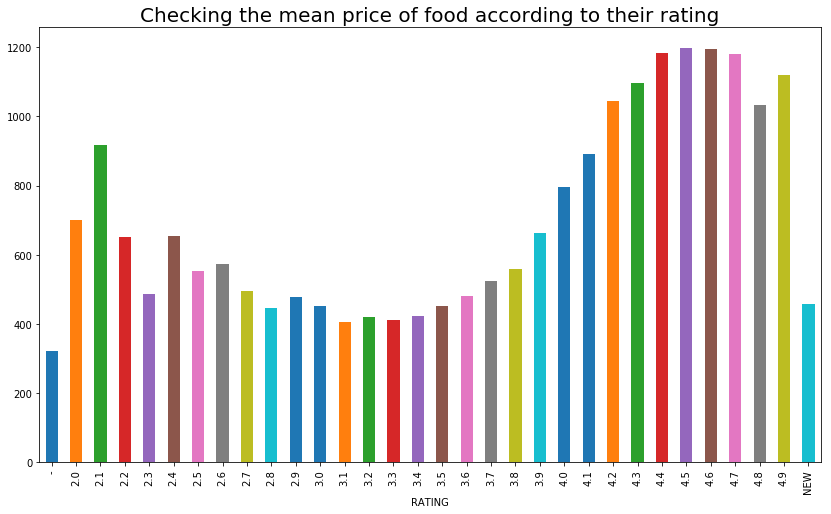

In [23]:
#CHECKING the mean of cost according to rating of food
plt.figure(figsize=(14,8))
df.groupby(['RATING'])['COST'].mean().plot(kind='bar')
plt.title('Checking the mean price of food according to their rating',fontsize=20)
plt.show()

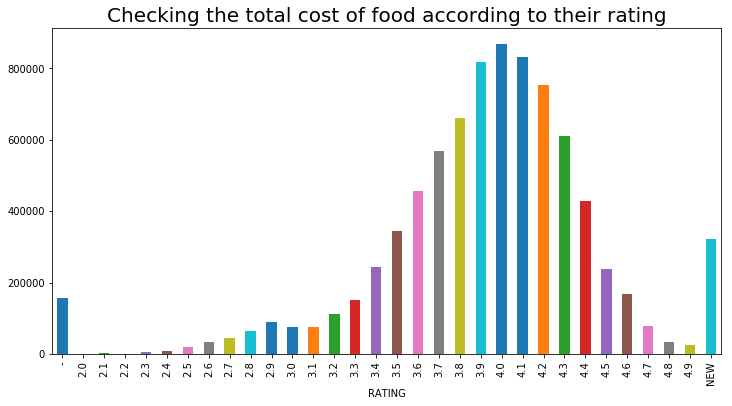

In [24]:
#Checking the total cost of food according to rating 
plt.figure(figsize=(12,6))
df.groupby(['RATING'])['COST'].sum().plot(kind='bar')
plt.title('Checking the total cost of food according to their rating',fontsize=20)
plt.show()

Observation:
    
    In rating column there are two different rating i.e.'NEW' and '-' which needs to be removed.

In [25]:
#Changing the data types of Rating column and replacing the values
df['RATING'] = df['RATING'].astype('object')
df['RATING'] = df['RATING'].replace({'-':0.0, 'NEW':5.0})

In [26]:
#Checking the summary statistics of rating column
df['RATING'].describe()

count     16891
unique       32
top         3.9
freq       1638
Name: RATING, dtype: object

In [27]:
#Changing the data type of rating column into float
df['RATING'] = df['RATING'].astype(float) 

### Checking the missing values

In [28]:
#Checking the missing values
df.isnull().sum()

CITY              147
COST             4230
CUISINES            0
LOCALITY          128
RATING              4
RESTAURANT_ID       0
TIME                0
TITLE               0
VOTES            1602
source              0
dtype: int64

Observation:
    
    1-There are null values in City, Cost, Locality, Rating, Votes column.
    
    2-We do not fill the missing values of Cost column as it is our test data.
    
    3-Before filling  the missing values in votes column first we have to split the values.

In [29]:
#Splitting the values and putting it new column
new_vote= df["VOTES"].str.split(" ", n = 1, expand =True)

In [30]:
df['votes_no'] = new_vote[0]
df['votes'] = new_vote[1]

In [31]:
df.head()

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,source,votes_no,votes
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49 votes,Train,49,votes
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30 votes,Train,30,votes
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221 votes,Train,221,votes
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24 votes,Train,24,votes
4,Mumbai,300.0,Desserts,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165 votes,Train,165,votes


In [32]:
df['votes_no'] = df['votes_no'].astype(float)

### Filling the missing values

In [33]:
#Filling with mode
df['votes_no'].fillna(df['votes_no'].mode()[0], inplace=True)

In [34]:
#Filling with median
df['RATING'].fillna(df['RATING'].median(), inplace=True)

In [35]:
#Filling with mode
df['LOCALITY'].fillna(df['LOCALITY'].mode()[0], inplace=True)

In [36]:
#Filling with mode
df['CITY'].fillna(df['CITY'].mode()[0], inplace=True)

### Dropping columns

In [37]:
df = df.drop(['VOTES', 'votes'], axis=1)

In [38]:
df.isnull().sum()

CITY                0
COST             4230
CUISINES            0
LOCALITY            0
RATING              0
RESTAURANT_ID       0
TIME                0
TITLE               0
source              0
votes_no            0
dtype: int64

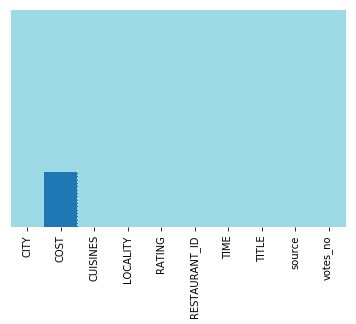

In [39]:
#Now again check it via visualization
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='tab20_r')
plt.show()

In [40]:
df.head(2)

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,source,votes_no
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,Train,49.0
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",Train,30.0


In [41]:
#Checking the skewness of the cost column and removing it

print('Skewness in COST:',train_df['COST'].skew())

train_df['COST'] = np.log(train_df['COST'])

print('Skewness :',train_df['COST'].skew())

Skewness in COST: 3.9788007578247573
Skewness : 0.39234976967993035


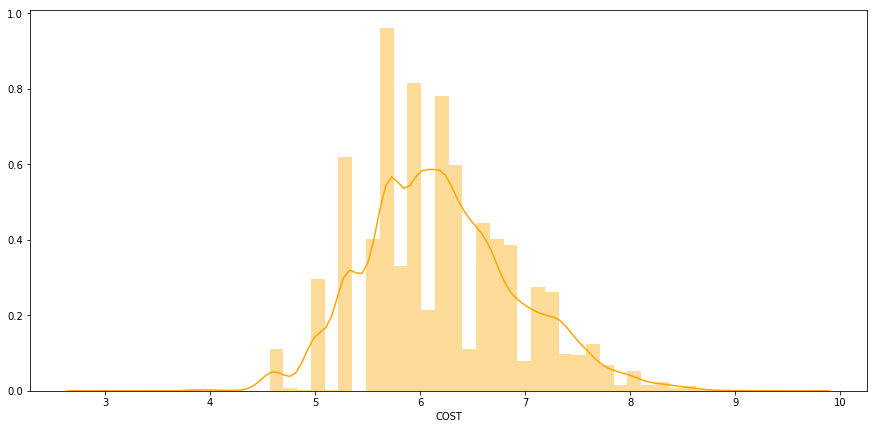

In [42]:
plt.subplots(figsize=(15, 7))
sns.distplot(train_df['COST'].sort_values(),color='orange')
plt.show()

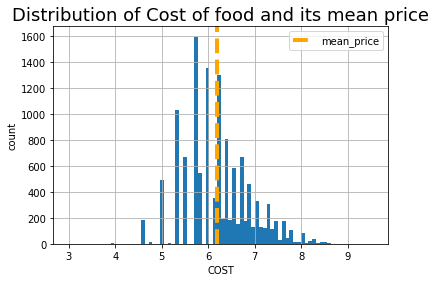

In [43]:
#Checking the mean of Cost in train data set

Cost = train_df['COST'].hist(bins=80)
mean_val = np.mean(train_df['COST'])
plt.axvline(mean_val,linewidth=4,  color='orange', label='mean_price',linestyle='dashed')
plt.title('Distribution of Cost of food and its mean price',fontsize=18)
plt.xlabel('COST')
plt.ylabel('count')
plt.legend()
plt.show()

# Dealing with Categorical Column

In [44]:
df.head(3)

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,source,votes_no
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,Train,49.0
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",Train,30.0
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,Train,221.0


In [45]:
#Transform Non numeric columns into Numeric columns

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])

In [46]:
df.head(2)

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,source,votes_no
0,400,1200.0,3294,328,3.6,9438,898,34,1,49.0
1,75,1500.0,364,1214,4.2,13198,2301,36,1,30.0


In [47]:
df['source'].unique()

array([1, 0], dtype=int64)

# Model Training

In [48]:
#Splitting the data into train and test
Train = df.loc[df['source']==1]
Test = df.loc[df['source']==0]

In [49]:
#Dropping the source column as it is our label for training and testing data.
Train.drop('source',axis=1,inplace=True)
Test.drop(['source','COST'],axis=1,inplace=True)

In [50]:
Train.head(2)

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,votes_no
0,400,1200.0,3294,328,3.6,9438,898,34,49.0
1,75,1500.0,364,1214,4.2,13198,2301,36,30.0


In [51]:
Test.head(2)

,CITY,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,votes_no
12690,323,3878,1314,4.3,4085,1417,34,564.0
12691,277,4879,429,4.2,12680,2548,104,61.0


In [52]:
#Splitting the data into x_train and y_train
x_train = Train.drop(columns=["COST"])
y_train = Train["COST"]

In [53]:
#Importing all the model Library

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Importing Boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Importing error metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [54]:
# All Algorithm by using for loop

model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]


for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_train)
    print('Score of',m,'is:',score)
    print('MAE:',mean_absolute_error(y_train,predm))
    print('MSE:',mean_squared_error(y_train,predm))
    print('RMSE:',np.sqrt(mean_squared_error(y_train,predm)))
    print('R2_score:',r2_score(y_train,predm))
    print('*****************************************************************************************')
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) is: 0.15389553580872672
MAE: 331.93748126630675
MSE: 333015.65071346995
RMSE: 577.0750823883059
R2_score: 0.15389553580872672
*****************************************************************************************


Score of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) is: -0.06031746629273437
MAE: 357.94662765451307
MSE: 417327.086600159
RMSE: 646.0085809028848
R2_score: -0.06031746629273438
*****************************************************************************************


Score of DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') i

In [55]:
# Cross Validate All Algorithm by using for loop

model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]


for m in model:
    score=cross_val_score(m,x_train,y_train,cv=10,scoring='r2')
    print("Model:",m)
    print("Score:",score)
    print('Mean Score:',score.mean())
    print("Standard deviation:",score.std())
    print('************************************************************************************************')
    print('\n')

Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Score: [0.18699454 0.10628117 0.13116155 0.16385974 0.17422446 0.02198445
 0.15263749 0.1567551  0.18465678 0.19765034]
Mean Score: 0.14762056260097906
Standard deviation: 0.049263918027215935
************************************************************************************************


Model: SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Score: [-0.05936172 -0.05534131 -0.04931296 -0.05083622 -0.06356251 -0.06617711
 -0.06422534 -0.07832202 -0.07491529 -0.07089942]
Mean Score: -0.06329539149878805
Standard deviation: 0.009259393412959562
************************************************************************************************


Model: DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_spli

## I Choose DecisionTreeRegressor as my final model

In [56]:
#Using DecisionTreeRegressor 


dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
print('Score:',dtc.score(x_train,y_train))
pred=dtc.predict(x_train)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_train,pred))
print('Mean squared error:',mean_squared_error(y_train,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_train,pred)))
print('\n')
print("r2_score:",r2_score(y_train,pred))
print('\n')  

Score: 1.0


Mean absolute error: 0.0
Mean squared error: 0.0
Root Mean Squared Error: 0.0


r2_score: 1.0




In [57]:
score=cross_val_score(dtc,x_train,y_train,cv=15,scoring='r2')
print('Mean Score:',score.mean())
print("Standard deviation:",score.std())

Mean Score: 0.4788124146685758
Standard deviation: 0.1346413696017985


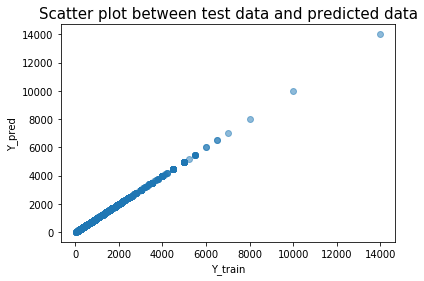

In [58]:
#Scatter plot between test data and prediction
plt.scatter(y_train, pred, alpha = 0.5)
plt.xlabel("Y_train")
plt.ylabel("Y_pred")
plt.title("Scatter plot between test data and predicted data",fontsize=15)
plt.show()

In [59]:
#Saving the model
#Importing joblib
from sklearn.externals import joblib

# Save the model as a pickle in a file
joblib.dump(dtc,'Resturant_Food_Cost_dtc.csv')

['Resturant_Food_Cost_dtc.csv']

### Load the model and predict the cost

In [60]:
#Load the model from the file
dtc_from_joblib=joblib.load('Resturant_Food_Cost_dtc.csv')

#Use the loaded model to make prediction
prediction=dtc_from_joblib.predict(Test)
prediction

array([900., 200., 800., ..., 400., 500., 650.])